In [20]:
import csv
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional
from nltk.corpus import stopwords

In [21]:
with open("nursery_rhymes.txt", "r") as file:
    contents = file.read()
    new_text = contents.lower().split("\n")
print(new_text)

['the queen _of_ hearts', '', '', '    the queen of hearts she made some tarts,', "      all on a summer's day;", '', '    the knave of hearts he stole those tarts,', '      and took them clean away.', '', '    the king of hearts called for those tarts,', '    and beat the knave full sore.', '', '    the knave of hearts brought back those tarts,', "      and vowed he'd steal no more.", '', '', '', '', "saint swithin's day", '', '', "    st. swithin's day, if thou dost rain,", '    for forty days it will remain;', "    st. swithin's day, if thou be fair,", "    for forty days 't will rain no more.", '', '', '', '', 'dance to your daddie', '', '', '      dance to your daddie,', '      my bonnie laddie,', '    dance to your daddie, my bonnie lamb!', '      you shall get a fishie', '      on a little dishie,', '    you shall get a fishie when the boat comes hame!', '', '      dance to your daddie,', '      my bonnie laddie,', '    dance to your daddie, and to your mammie sing!', '      you

In [22]:
# set hyperparameters
embedding_dim = 64
oov_tok = '<OOV'
trunc_type = 'post'
padding_type = 'post'

In [23]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(new_text)
vocab_size = len(tokenizer.word_index)+1

print(tokenizer.word_index)
print(vocab_size)

{'the': 1, 'and': 2, 'a': 3, 'to': 4, 'he': 5, 'i': 6, 'in': 7, 'little': 8, 'was': 9, 'of': 10, 'you': 11, 'she': 12, 'my': 13, 'with': 14, 'his': 15, 'that': 16, 'it': 17, 'for': 18, 'all': 19, 'as': 20, 'on': 21, 'is': 22, 'her': 23, 'there': 24, 'they': 25, 'up': 26, 'when': 27, 'will': 28, 'so': 29, 'went': 30, 'do': 31, 'old': 32, 'not': 33, 'them': 34, 'have': 35, 'him': 36, 'be': 37, 'me': 38, 'had': 39, 'said': 40, 'what': 41, 'says': 42, 'down': 43, 'but': 44, 'one': 45, 'then': 46, 'your': 47, 'dog': 48, 'if': 49, "won't": 50, 'shall': 51, 'man': 52, 'came': 53, 'jack': 54, 'sing': 55, 'come': 56, 'are': 57, 'oh': 58, 'three': 59, 'out': 60, "i'll": 61, 'away': 62, 'pig': 63, 'rowley': 64, 'by': 65, 'two': 66, 'cat': 67, 'go': 68, 'made': 69, 'were': 70, 'day': 71, 'at': 72, 'lady': 73, 'an': 74, 'would': 75, 'who': 76, 'this': 77, 'get': 78, 'ho': 79, 'some': 80, 'over': 81, 'very': 82, 'mother': 83, 'house': 84, 'cow': 85, 'woman': 86, 'home': 87, 'back': 88, 'water': 89, 

In [24]:
max_length = max([len(i) for i in input_sequences])

sequences = tokenizer.texts_to_sequences(new_text)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [36]:
input_sequences = []
for line in new_text:
    tokens = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokens)):
        n_gram_sequence = tokens[:i+1]
        input_sequences.append(n_gram_sequence)

In [37]:
input_seq_array = np.array(pad_sequences(input_sequences,
                                        maxlen = max_seq_len,
                                        padding='pre'))
labels = input_seq_array[:,-1]


In [38]:
# Create features and labels
x = input_seq_array[:, :-1]
labels = input_seq_array[:, -1]
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [39]:
# Create, compile, and train model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 60, input_length=max_seq_len-1),
    tf.keras.layers.Dropout(0.5)
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(60)),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])

Adam = tf.keras.optimizers.Adam(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer=Adam, metrics=['accuracy'])
history = model.fit(x, y, epochs=100, verbose=1)

Epoch 1/100
442/442 [==============================] - 9s 18ms/step - loss: 6.6314 - accuracy: 0.0461
Epoch 2/100
442/442 [==============================] - 8s 17ms/step - loss: 6.1881 - accuracy: 0.0600
Epoch 3/100
442/442 [==============================] - 8s 17ms/step - loss: 5.9408 - accuracy: 0.0678
Epoch 4/100
442/442 [==============================] - 8s 17ms/step - loss: 5.6967 - accuracy: 0.0734
Epoch 5/100
442/442 [==============================] - 8s 17ms/step - loss: 5.4668 - accuracy: 0.0847
Epoch 6/100
442/442 [==============================] - 8s 17ms/step - loss: 5.2494 - accuracy: 0.1053
Epoch 7/100
442/442 [==============================] - 8s 17ms/step - loss: 5.0319 - accuracy: 0.1248
Epoch 8/100
442/442 [==============================] - 8s 18ms/step - loss: 4.8306 - accuracy: 0.1440
Epoch 9/100
442/442 [==============================] - 8s 17ms/step - loss: 4.6388 - accuracy: 0.1647
Epoch 10/100
442/442 [==============================] - 8s 17ms/step - loss: 4.458

442/442 [==============================] - 8s 18ms/step - loss: 0.9082 - accuracy: 0.7705
Epoch 81/100
442/442 [==============================] - 8s 18ms/step - loss: 0.8956 - accuracy: 0.7702
Epoch 82/100
442/442 [==============================] - 8s 18ms/step - loss: 0.8843 - accuracy: 0.7713
Epoch 83/100
442/442 [==============================] - 8s 18ms/step - loss: 0.8992 - accuracy: 0.7683
Epoch 84/100
442/442 [==============================] - 8s 18ms/step - loss: 0.8708 - accuracy: 0.7765
Epoch 85/100
442/442 [==============================] - 8s 18ms/step - loss: 0.8648 - accuracy: 0.7734
Epoch 86/100
442/442 [==============================] - 8s 18ms/step - loss: 0.8624 - accuracy: 0.7727
Epoch 87/100
442/442 [==============================] - 8s 18ms/step - loss: 0.8501 - accuracy: 0.7753
Epoch 88/100
442/442 [==============================] - 8s 17ms/step - loss: 0.8439 - accuracy: 0.7788
Epoch 89/100
442/442 [==============================] - 8s 18ms/step - loss: 0.8544 - 

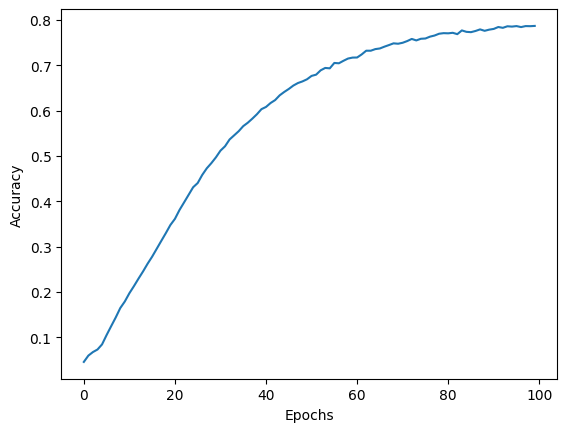

In [40]:
# Visualize accuracy

import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [41]:
# Generate a new nursery rhyme

title = "Randomly Generated Nursery Rhyme"
seed_text = "It"
line_count = 30
line_size = 20

print(title)
print()

for i in range(line_count):
    for j in range(line_size):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list))
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    seed_text += "\n"

    
print(seed_text)

Randomly Generated Nursery Rhyme

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 13ms/step
It it was full of pretty things and love to you give her mammy do morrow by about spin joiner cellar
 bell the crumpled spit spit bird's ship bow hay his gun mark morn doodle singing quickset hem bow tub gave
 some black foot of the knee were the crumpled horn stream the grass lady's sun's door when's dumps dumps forest
 better child's forest shoe's see tiny quartered clay dogs gave hills and draw shoot wash of catch help him way
 fishes bed keep her sleeve in a carving knife e ho as hoarse ride some to her met in the
 dumps said the mastery the crown off night grind dumps bed gave your threads made of lead lead lead such
 quiet of beef eggs well piper fine eve they spoke ne'er flinders awake feed the safety pheasant sheaves me e
 stayed easter spain pigeon scuttle awake grocer's pigeon grocer's nightgown worth custard knee will rogue protector thieves wang wander waddle
 sparrows sparrows read buns read rise gave to play foot play wi